### Parallel MPI simulaton of 2D Onszager-Tang Magnetohydrodynamic Vortex 

### Spin-Up MPI cluster, execute simulation code, write to cloud storage

In [1]:
import camber

In [18]:
# download Athena++ from public repo and compile
import os
os.system("git clone https://github.com/PrincetonUniversity/athena.git")
camber.compiler.run("cd athena && python configure.py -b --prob=orszag_tang -mpi -hdf5 --hdf5_path=${HDF5_PATH} && make clean && make all")

Output()

2023-07-12T07:26:13.869834+00:00 - Your Athena++ distribution has now been configured with the following options:
2023-07-12T07:26:13.869858+00:00 -   Problem generator:          orszag_tang
2023-07-12T07:26:13.869860+00:00 -   Coordinate system:          cartesian
2023-07-12T07:26:13.869861+00:00 -   Equation of state:          adiabatic
2023-07-12T07:26:13.869862+00:00 -   Riemann solver:             hlld
2023-07-12T07:26:13.869863+00:00 -   Magnetic fields:            ON
2023-07-12T07:26:13.869865+00:00 -   Number of scalars:          0
2023-07-12T07:26:13.869866+00:00 -   Special relativity:         OFF
2023-07-12T07:26:13.869867+00:00 -   General relativity:         OFF
2023-07-12T07:26:13.869869+00:00 -   Frame transformations:      OFF
2023-07-12T07:26:13.869870+00:00 -   Self-Gravity:               OFF
2023-07-12T07:26:13.869871+00:00 -   Super-Time-Stepping:        OFF
2023-07-12T07:26:13.869872+00:00 -   Debug flags:                OFF
2023-07-12T07:26:13.869874+00:00 -   Cod

In [19]:
# run camber with LARGE instance
worker = camber.mpi.run(
    command="mpirun -np 32 athena/bin/athena -i athinput.orszag-tang",
    worker_size="LARGE"
)

Output()

In [21]:
# Check the job progress
worker.read_logs(tail_lines=10)

2023-07-12T07:29:58.378448+00:00 - cycle=3651 time=9.9980921960047664e-01 dt=1.9078039952336034e-04
2023-07-12T07:29:58.388092+00:00 - cycle=3652 time=1.0000000000000000e+00 dt=2.5940688969068669e-04
2023-07-12T07:29:58.552492+00:00 - 
2023-07-12T07:29:58.552508+00:00 - Terminating on time limit
2023-07-12T07:29:58.552510+00:00 - time=1.0000000000000000e+00 cycle=3652
2023-07-12T07:29:58.552520+00:00 - tlim=1.0000000000000000e+00 nlim=-1
2023-07-12T07:29:58.552521+00:00 - 
2023-07-12T07:29:58.552523+00:00 - zone-cycles = 957349888
2023-07-12T07:29:58.552524+00:00 - cpu time used  = 4.0574705999999999e+01
2023-07-12T07:29:58.552525+00:00 - zone-cycles/cpu_second = 2.3594746145542003e+07


### Read data from cloud storage and process for visualization

In [2]:
from plot_output import plot_output

plotting OrszagTang.out2.00000.athdf...


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'OrszagTang.out2.00000.athdf', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

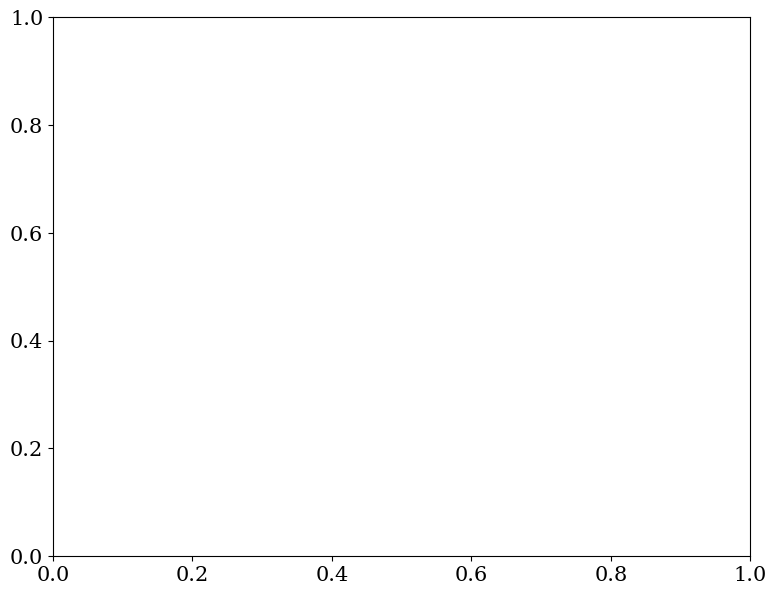

In [3]:
import os
os.system("mkdir output_images")
plot_output()

### Visualize Data

In [3]:
from IPython.display import Video
Video("density.mov")